# [Kaggle Restaurant Revenue Prediction](https://www.kaggle.com/c/restaurant-revenue-prediction)

## Predict annual restaurant sales based on objective measurements

## Import libraries and data; explore the data

Let's begin by importing the Python libraries and data that we'll need:

In [391]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

In [392]:
train_data = pd.read_csv("train.csv")
train_data = train_data.drop('Id', axis=1)
test_data = pd.read_csv("test.csv")
test_data = test_data.drop('Id', axis=1)

Now for a bit of exploratory data analysis so we can get to know our data:

In [393]:
display(train_data[:10])

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
5,02/12/2010,Ankara,Big Cities,FC,6,6.0,4.5,7.5,8,10,...,5.0,0,0,0,0,0,0,0,0,5017319.0
6,10/11/2010,İstanbul,Big Cities,IL,2,3.0,4.0,4.0,1,5,...,3.0,4,5,2,2,3,5,4,4,5166635.0
7,06/21/2011,İstanbul,Big Cities,IL,4,5.0,4.0,5.0,2,3,...,2.0,0,0,0,0,0,0,0,0,4491607.0
8,08/28/2010,Afyonkarahisar,Other,IL,1,1.0,4.0,4.0,1,2,...,3.0,4,5,5,3,4,5,4,5,4952497.0
9,11/16/2011,Edirne,Other,IL,6,4.5,6.0,7.5,6,4,...,2.5,0,0,0,0,0,0,0,0,5444227.0


In [394]:
display(test_data[:10])

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,2.0,3.0,0,0,0,0,0,0,0,0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,2.0,3.0,0,4,0,0,0,0,0,0
4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,5.0,3.0,0,0,0,0,0,0,0,0
5,11/29/2007,Eskişehir,Other,FC,4,4.5,5.0,4.0,2,6,...,2.0,3.0,0,0,0,0,0,0,0,0
6,11/05/2008,Rize,Other,FC,4,2.0,4.0,4.0,2,2,...,1.0,3.0,3,5,4,1,2,0,0,0
7,12/03/2013,Ankara,Big Cities,IL,2,5.0,4.0,5.0,2,3,...,3.0,1.0,3,0,0,0,3,0,4,4
8,05/30/2006,İstanbul,Big Cities,IL,5,4.0,4.0,4.0,1,3,...,5.0,1.0,0,4,0,0,3,5,0,0
9,01/20/2012,İstanbul,Big Cities,IL,15,7.5,6.0,3.0,4,8,...,1.0,2.5,20,2,0,2,24,4,0,3


In [395]:
train_data.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [396]:
test_data.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.088030,4.428085,4.215325,4.396025,1.989590,2.881900,5.30051,4.93100,5.251380,5.458970,...,3.233785,3.084000,2.083300,1.193330,1.942640,0.987430,2.108670,1.832830,1.968890,0.973500
std,2.812963,1.428865,0.842161,1.035827,1.065314,1.531429,2.17858,1.71849,1.702632,1.763601,...,2.136694,1.783927,4.309479,2.307944,3.971298,1.534808,4.685414,3.228769,3.805773,1.677267
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.00000,4.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.750000,4.000000,4.000000,1.000000,2.000000,5.00000,4.00000,4.000000,5.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.00000,5.00000,5.000000,5.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,5.00000,5.00000,5.000000,5.000000,...,4.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
max,15.000000,7.500000,6.000000,7.500000,6.000000,10.000000,10.00000,10.00000,10.000000,10.000000,...,12.500000,10.000000,25.000000,15.000000,25.000000,6.000000,30.000000,15.000000,20.000000,8.000000


In [397]:
train_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [398]:
train_data.tail()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0
136,09/01/2009,İstanbul,Big Cities,FC,4,5.0,3.0,5.0,2,2,...,3.0,0,0,0,0,0,0,0,0,6363241.0


In [399]:
train_data.sample(5)

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
111,08/10/2012,Kütahya,Other,FC,2,3.0,4.0,4.0,2,1,...,3.0,0,0,0,0,0,0,0,0,2993069.0
43,09/24/2009,Ankara,Big Cities,FC,2,4.0,5.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,2732645.0
124,08/18/2005,Ankara,Big Cities,DT,1,3.0,0.0,5.0,5,5,...,3.0,0,0,0,0,0,0,0,0,3810007.0
74,12/01/2011,İstanbul,Big Cities,IL,12,7.5,6.0,6.0,2,8,...,2.5,20,9,15,4,12,12,12,4,5500818.0
41,06/01/2009,İstanbul,Big Cities,IL,4,5.0,5.0,4.0,1,5,...,1.0,5,5,4,3,3,4,4,1,4554237.0


In [400]:
train_data.keys()

Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue'],
      dtype='object')

In [401]:
test_data.keys()

Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37'],
      dtype='object')

In [402]:
test_data.keys()

Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37'],
      dtype='object')

## Plot the data

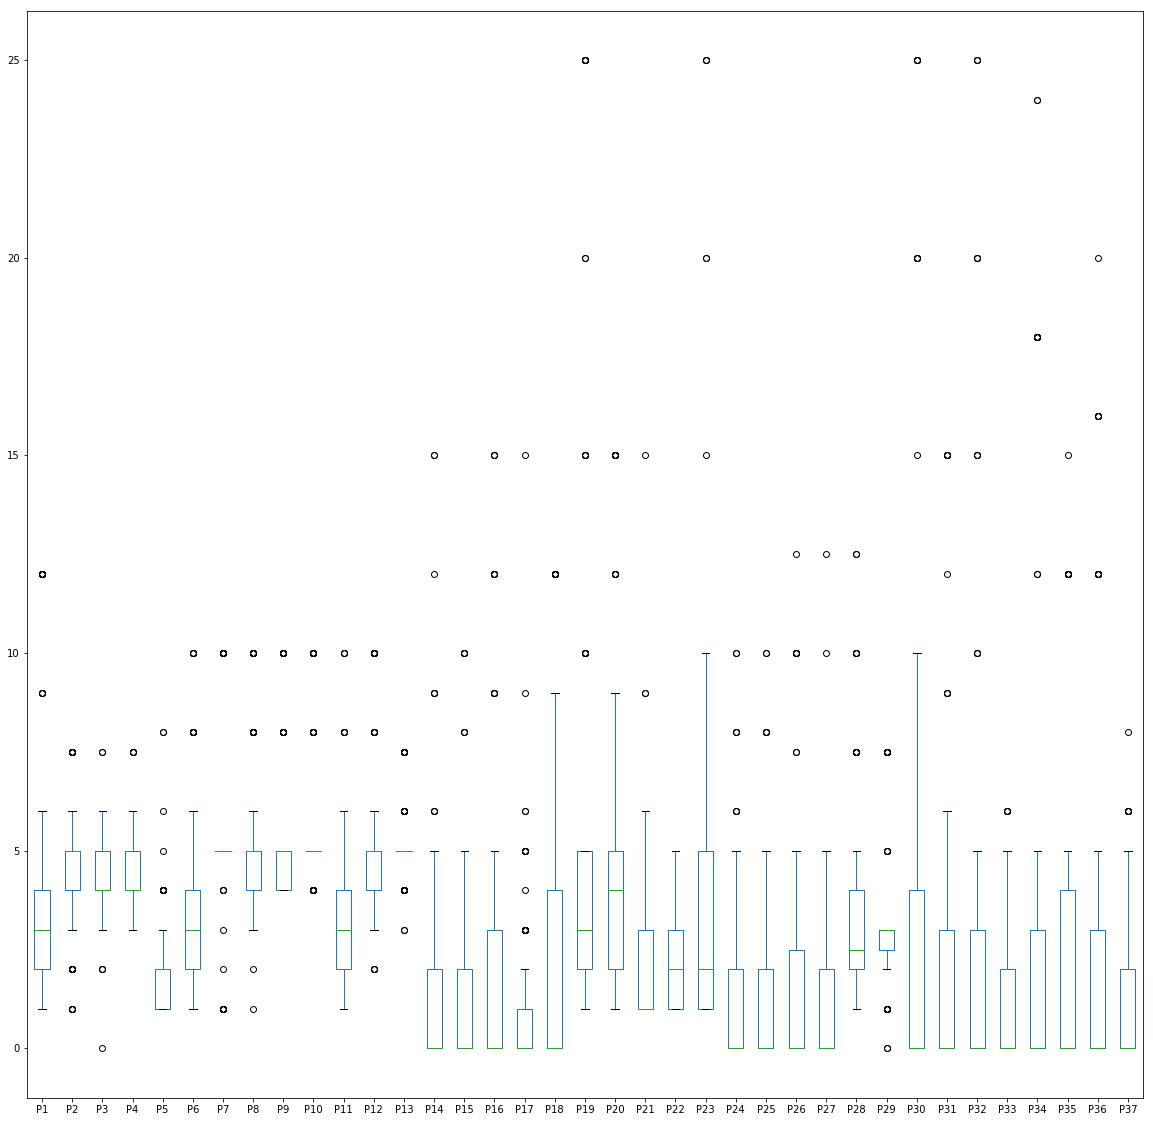

In [403]:
feature_columns = train_data[['P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37']]
feature_columns.plot.box(figsize=(20, 20))

I'm sure there are more creative and informative ways to plot the data, but for now it's time to move on.

## Massage, munge, preprocess, and visualize the data

In [404]:
# Format the data so that dates are easier to work with.
# Create a column that contains data about the number of days the restaurant has been open.
# Remove the column that has the restaurant's opening date.

train_data['Open Date'] = pd.to_datetime(train_data['Open Date'], format='%m/%d/%Y')
test_data['Open Date'] = pd.to_datetime(test_data['Open Date'], format='%m/%d/%Y')

train_data['OpenDays'] = ""
test_data['OpenDays'] = ""

date_last_train = pd.DataFrame({'Date':np.repeat(['01/01/2015'], [len(train_data)])})
date_last_test = pd.DataFrame({'Date':np.repeat(['01/01/2015'], [len(test_data)])})

date_last_train['Date'] = pd.to_datetime(date_last_train['Date'], format='%m/%d/%Y')
date_last_test['Date'] = pd.to_datetime(date_last_test['Date'], format='%m/%d/%Y')

train_data['OpenDays'] = date_last_train['Date'] - train_data['Open Date']
test_data['OpenDays'] = date_last_test['Date'] - test_data['Open Date']

train_data['OpenDays'] = train_data['OpenDays'].astype('timedelta64[D]').astype(int)
test_data['OpenDays'] = test_data['OpenDays'].astype('timedelta64[D]').astype(int)

train_data = train_data.drop('Open Date', axis=1)
test_data = test_data.drop('Open Date', axis=1)

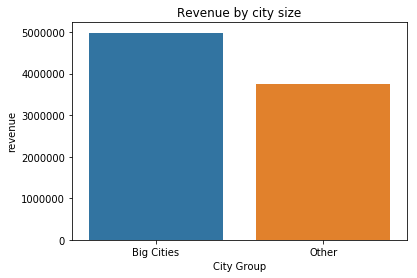

In [405]:
# Compare the revenue generated by the restaurants in Big Cities vs Other:
city_perc = train_data [["City Group", "revenue"]].groupby(['City Group'], as_index=False).mean()
sns.barplot(x='City Group', y='revenue', data=city_perc)
plt.title("Revenue by city size")

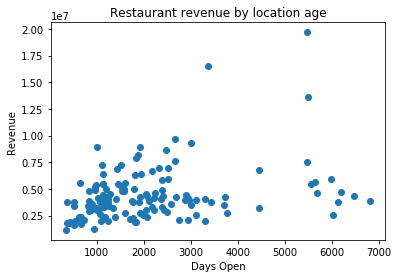

In [406]:
# Convert data from 'City Group' and create columns of indicator variables for 'Big Cities' or 'Other':
city_group_dummy = pd.get_dummies(train_data['City Group'])
train_data = train_data.join(city_group_dummy)
city_group_dummy_test = pd.get_dummies(test_data['City Group'])
test_data = test_data.join(city_group_dummy_test)

train_data = train_data.drop('City Group', axis=1)
test_data = test_data.drop('City Group', axis=1)

# Create scatterplot showing how long a restaurant has been open impacts revenue.
# This will also show any outliers.
plt.scatter(train_data['OpenDays'], train_data['revenue'])
plt.xlabel("Days Open")
plt.ylabel("Revenue")
plt.title("Restaurant revenue by location age")

## Try various machine learning algorithms  
Let's try on some algorithms and see how they predict and fit: